 # Employee Absenteeism
This project develops a predictive model for employee absenteeism using data cleaning, visualization, and machine learning techniques, aiming to provide actionable insights for reducing workplace absenteeism.

## Importing Libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Loading the Dataset

In [108]:
with open('Absenteeism-data.csv') as r:
    raw_csv_file = pd.read_csv(r, delimiter=',')
raw_csv_file

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [109]:
fData = raw_csv_file.copy()

## Initial Inspection

In [110]:
type(fData)

pandas.core.frame.DataFrame

In [111]:
fData.columns

Index(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

In [112]:
fData.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


## Drop the ID column because it isn't needed for predicting  Absenteeism time in hours

In [113]:
fData.drop(['ID'], axis=1, inplace=True)

In [114]:
u_reason_for_absence = fData['Reason for Absence'].unique()
# type(u_reason_for_absence)
u_reason_for_absence.sort()
u_reason_for_absence

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

## Metadata for Reason for absence
0	Certain infectious and parasitic diseases
1	Neoplasms
2	Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
3	Endocrine, nutritional and metabolic diseases
4	Mental and behavioural disorders
5	Diseases of the nervous system
6	Diseases of the eye and adnexa
7	Diseases of the ear and mastoid process
8	Diseases of the circulatory system
9	Diseases of the respiratory system
10	Diseases of the digestive system
11	Diseases of the skin and subcutaneous tissue
12	Diseases of the musculoskeletal system and connective tissue
13	Diseases of the genitourinary system
14	Pregnancy, childbirth and the puerperium
15	Certain conditions originating in the perinatal period
16	Congenital malformations, deformations and chromosomal abnormalities
17	Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
18	Injury, poisoning and certain other consequences of external causes
19	External causes of morbidity and mortality
21	Factors influencing health status and contact with health services
22	Patient follow-up
23	Medical consultation
24	Blood donation
25	Laboratory examination
26	Unjustified absence
27	Physiotherapy
28	Dental consultation


In [115]:
fData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Reason for Absence         700 non-null    int64  
 1   Date                       700 non-null    object 
 2   Transportation Expense     700 non-null    int64  
 3   Distance to Work           700 non-null    int64  
 4   Age                        700 non-null    int64  
 5   Daily Work Load Average    700 non-null    float64
 6   Body Mass Index            700 non-null    int64  
 7   Education                  700 non-null    int64  
 8   Children                   700 non-null    int64  
 9   Pets                       700 non-null    int64  
 10  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 60.3+ KB


### Visualizing "Reason for Absence"

We visualize the "Reason for Absence" column using a bar plot to identify the most common causes of employee absenteeism. This will help us determine which reasons are most frequent, aiding in targeted efforts to reduce absenteeism.


In [116]:
fData['Reason for Absence'].value_counts().sort_index()

Reason for Absence
0      38
1      16
2       1
3       1
4       2
5       3
6       6
7      13
8       5
9       4
10     22
11     24
12      8
13     52
14     18
15      2
16      3
17      1
18     21
19     36
21      6
22     32
23    147
24      3
25     29
26     31
27     66
28    110
Name: count, dtype: int64

In [117]:
u_reason_for_absence

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

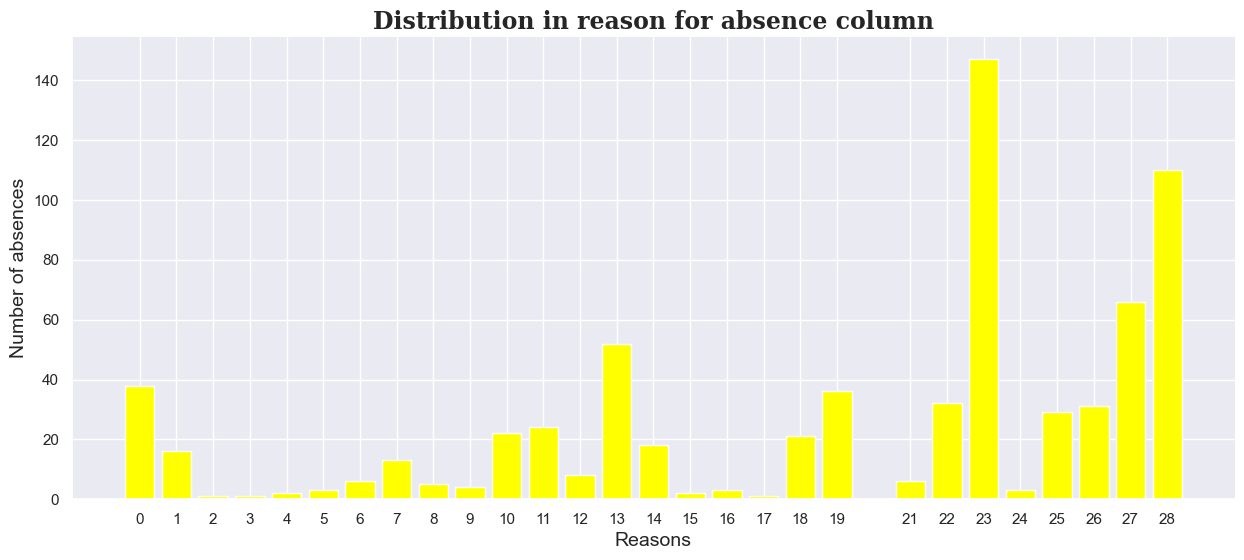

In [118]:

plt.figure(figsize=(15, 6))
plt.bar(u_reason_for_absence, fData['Reason for Absence'].value_counts().sort_index(), color='yellow')
title_font = {'family': 'serif',
              'weight': 'bold',
              'size': 17}
plt.title('Distribution in reason for absence column', fontdict=title_font)
plt.xticks(u_reason_for_absence)
plt.ylabel('Number of absences', fontdict={'size': 14})
plt.xlabel('Reasons', fontdict={'size': 14})
sns.despine()
plt.show()

As you can see it's clear from chart that reason 23(Medical consultation) and reason 28(Dental consultation) are the most reasons why employees will absence

## Data Cleaning

In [119]:
pd.isna(fData).sum()

Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

In [120]:
fData[fData.duplicated(keep=False)]

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
121,27,11/01/2016,118,10,37,308.593,28,1,0,0,2
123,27,12/01/2016,118,10,37,308.593,28,1,0,0,2
124,27,13/01/2016,118,10,37,308.593,28,1,0,0,2
127,27,11/01/2016,118,10,37,308.593,28,1,0,0,2
128,27,12/01/2016,118,10,37,308.593,28,1,0,0,2
131,27,13/01/2016,118,10,37,308.593,28,1,0,0,2
304,23,19/10/2016,235,20,43,265.017,38,1,1,0,2
305,23,19/10/2016,235,20,43,265.017,38,1,1,0,2
385,27,22/02/2017,179,51,38,251.818,31,1,0,0,3
386,27,24/02/2017,179,51,38,251.818,31,1,0,0,3


In [121]:
fData.size

7700

## Data Backup: for drop_duplicates

In [122]:
fData_backup1 = fData.copy()
fData_backup1.size

7700

In [123]:
fData_backup1

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
695,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


---------------------------------------------------------------------- Continue Data Cleaning

In [124]:
fData.drop_duplicates(keep='first', inplace=True)

In [125]:
fData.size

7612

## Categorize "Reason For Absence" Column
The "Reason for Absence" column contains nominal variables, which should be converted to dummy variables for proper categorization. 

In [126]:
fData

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
695,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [127]:
dummy_reason_for_absence = pd.get_dummies(fData['Reason for Absence'], drop_first=True, dtype=int)

In [128]:
dummy_reason_for_absence

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Categorize reason for absence due to meta data
Reason1 = 0-14 
Reason2 = 15-17
Reason3 = 18-21
Reason4 = 22-28

i categorize them base on similarity 

In [129]:
dummy_reason_for_absence[1]

0      0
1      0
2      0
3      0
4      0
      ..
695    0
696    0
697    0
698    0
699    0
Name: 1, Length: 692, dtype: int32

In [130]:
reason_1 = dummy_reason_for_absence.loc[:, 1:14].max(axis=1)
reason_2 = dummy_reason_for_absence.loc[:, 15:17].max(axis=1)
reason_3 = dummy_reason_for_absence.loc[:, 18:21].max(axis=1)
reason_4 = dummy_reason_for_absence.loc[:, 22:].max(axis=1)

In [131]:
print(reason_1.sum())
print(reason_2.sum())
print(reason_3.sum())
print(reason_4.sum())

175
6
63
410


In [132]:
for name, value in [('Reason_1', reason_1),
                    ('Reason_2', reason_2),
                    ('Reason_3', reason_3),
                    ('Reason_4', reason_4)]:
    fData.insert(1, name, value)

In [133]:
fData

,Reason for Absence,Reason_4,Reason_3,Reason_2,Reason_1,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,1,0,0,0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,1,0,0,0,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,0,0,0,1,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,1,0,0,0,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,10,0,0,0,1,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,6,0,0,0,1,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,10,0,0,0,1,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,23,1,0,0,0,24/05/2018,235,16,32,237.656,25,3,0,0,2


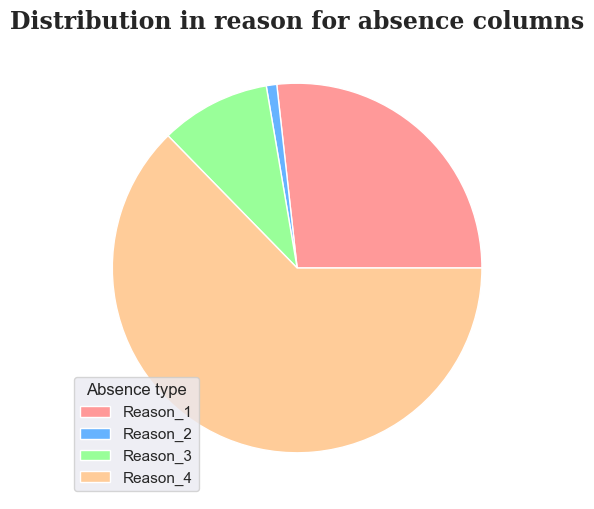

In [134]:
plt.figure(figsize=(15, 6))
labels = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
y = [reason_1.sum(), reason_2.sum(), reason_3.sum(), reason_4.sum()]
plt.pie(y, colors=colors)
title_font = {'family': 'serif',
              'weight': 'bold',
              'size': 17}
plt.legend(labels, title='Absence type', loc='best')
plt.title('Distribution in reason for absence columns', fontdict=title_font)
plt.show()

## dropping 'Reason for Absence' column to avoid multicollinearity 

In [135]:
fData.drop('Reason for Absence', axis=1, inplace=True)

In [136]:
fData.shape

(692, 14)

In [137]:
fData

,Reason_4,Reason_3,Reason_2,Reason_1,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,1,0,0,0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,1,0,0,0,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,0,0,0,1,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,1,0,0,0,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,1,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,0,0,0,1,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,0,0,0,1,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,1,0,0,0,24/05/2018,235,16,32,237.656,25,3,0,0,2


## Meta data for BMI 
BMI Categories:
The World Health Organization (WHO) defines BMI categories as follows:

Underweight: BMI < 18.5
Normal weight: BMI 18.5–24.9
Overweight: BMI 25.0–29.9
Obesity (Class 1): BMI 30.0–34.9
Obesity (Class 2): BMI 35.0–39.9
Extreme Obesity (Class 3): BMI ≥ 40.0

## Checking Education column

In [138]:
fData['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

## Extracting the Day of the Week and month of the year from Dates

In [139]:
type(fData['Date'])

pandas.core.series.Series

In [140]:
fData['Date']

0      07/07/2015
1      14/07/2015
2      15/07/2015
3      16/07/2015
4      23/07/2015
          ...    
695    23/05/2018
696    23/05/2018
697    24/05/2018
698    24/05/2018
699    31/05/2018
Name: Date, Length: 692, dtype: object

#### Backup before convert date column to datetime object

In [141]:
fData_backup2 = fData.copy()

In [142]:
type(fData_backup2['Date'])

pandas.core.series.Series

In [143]:
date_fData = pd.to_datetime(fData['Date'], dayfirst=True)
print(date_fData.dtype)

datetime64[ns]


In [144]:
day_of_week = date_fData.dt.weekday

In [145]:
day_of_week

0      1
1      1
2      2
3      3
4      3
      ..
695    2
696    2
697    3
698    3
699    3
Name: Date, Length: 692, dtype: int32

In [146]:
day_of_week.value_counts().sort_index()

Date
0    140
1    138
2    151
3    119
4    131
5      4
6      9
Name: count, dtype: int64

In [147]:
month_of_year = date_fData.dt.month

In [148]:
month_of_year

0      7
1      7
2      7
3      7
4      7
      ..
695    5
696    5
697    5
698    5
699    5
Name: Date, Length: 692, dtype: int32

In [149]:
date_fData

0     2015-07-07
1     2015-07-14
2     2015-07-15
3     2015-07-16
4     2015-07-23
         ...    
695   2018-05-23
696   2018-05-23
697   2018-05-24
698   2018-05-24
699   2018-05-31
Name: Date, Length: 692, dtype: datetime64[ns]

In [150]:
fData

,Reason_4,Reason_3,Reason_2,Reason_1,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,1,0,0,0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,1,0,0,0,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,0,0,0,1,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,1,0,0,0,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,1,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,0,0,0,1,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,0,0,0,1,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,1,0,0,0,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [151]:
fData.insert(2, 'Day of the week', day_of_week)

In [152]:
fData.insert(3, 'Month of the year', month_of_year)

## Day of the Week vs Employee Absences

This chart shows employee absences by day of the week to identify which days have the highest absence rates.

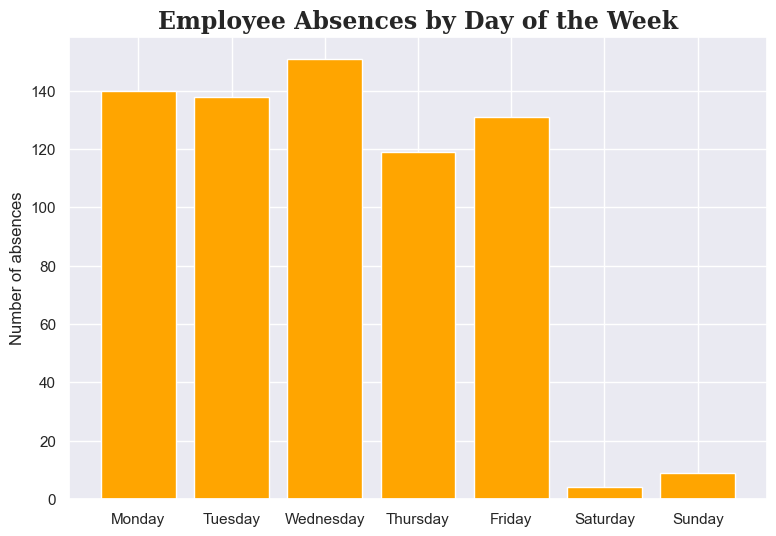

In [153]:
plt.figure(figsize=(9, 6))
days = [0, 1, 2, 3, 4, 5, 6, ]
xtick_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(days, day_of_week.value_counts().sort_index(), color='orange')
plt.xticks(ticks=days, labels=xtick_label)
plt.ylabel('Number of absences', fontdict={'size': 12})
plt.title('Employee Absences by Day of the Week', fontdict=title_font)
plt.show()

The chart shows that Wednesday has the highest employee absences, with Monday and Friday also seeing higher rates. Saturday and Sunday have the fewest absences, likely due to fewer workdays. This midweek peak could be important for staffing considerations.

## Employee Absence Hours Over the Month

In [154]:
grouped_by_month = fData.groupby('Month of the year').sum()['Absenteeism Time in Hours']
grouped_by_month = pd.DataFrame(grouped_by_month)

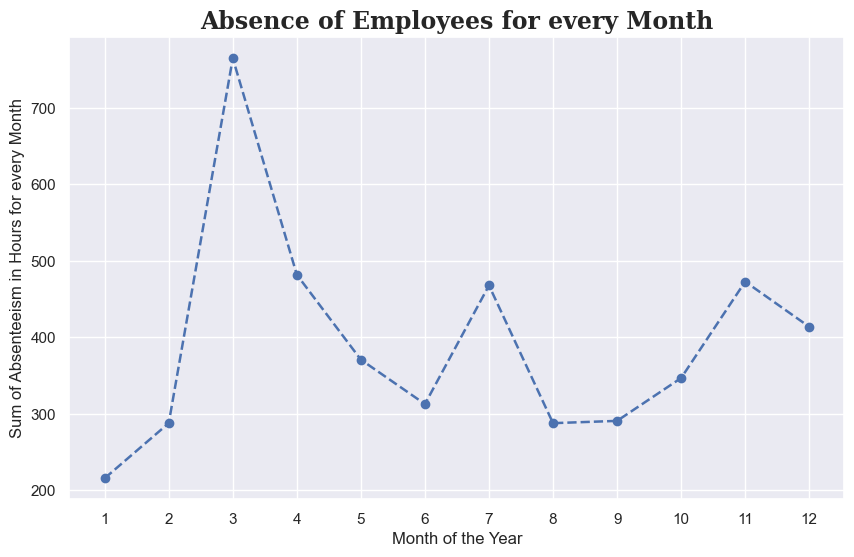

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_month.index, grouped_by_month['Absenteeism Time in Hours'], marker='o', linestyle='--',
         linewidth=1.8)
plt.title('Absence of Employees for every Month', fontdict=title_font)
plt.xticks(grouped_by_month.index)
plt.ylabel('Sum of Absenteeism in Hours for every Month', fontdict={'size': 12})
plt.xlabel('Month of the Year')
plt.show()

## Dropping Date column since it's not needed any more

In [156]:
fData.drop('Date', axis=1, inplace=True)

## Reordering Columns

In [157]:
fData.columns

Index(['Reason_4', 'Reason_3', 'Day of the week', 'Month of the year',
       'Reason_2', 'Reason_1', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

In [158]:
column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Day of the week',
                          'Month of the year', 'Transportation Expense', 'Distance to Work',
                          'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
                          'Children', 'Pets', 'Absenteeism Time in Hours']
fData = fData[column_names_reordered]

In [159]:
fData.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Day of the week,Month of the year,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,1,7,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,1,7,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,2,7,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,3,7,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,3,7,289,36,33,239.554,30,1,2,1,2


In [160]:
fData.shape

(692, 15)

## Checkpoint_1

In [161]:
fData.to_csv('Checkpoint_1')

In [162]:
df = pd.read_csv('Checkpoint_1')

In [163]:
df

,Unnamed: 0,Reason_1,Reason_2,Reason_3,Reason_4,Day of the week,Month of the year,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,0,1,1,7,289,36,33,239.554,30,1,2,1,4
1,1,0,0,0,0,1,7,118,13,50,239.554,31,1,1,0,0
2,2,0,0,0,1,2,7,179,51,38,239.554,31,1,0,0,2
3,3,1,0,0,0,3,7,279,5,39,239.554,24,1,2,0,4
4,4,0,0,0,1,3,7,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,695,1,0,0,0,2,5,179,22,40,237.656,22,2,2,0,8
688,696,1,0,0,0,2,5,225,26,28,237.656,24,1,1,2,3
689,697,1,0,0,0,3,5,330,16,28,237.656,25,2,0,0,8
690,698,0,0,0,1,3,5,235,16,32,237.656,25,3,0,0,2


## Checking Correlation
Check variable correlations to prevent multicollinearity.

In [164]:
df.corr()

,Unnamed: 0,Reason_1,Reason_2,Reason_3,Reason_4,Day of the week,Month of the year,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
Unnamed: 0,1.000000,0.016244,0.067786,-0.087191,0.050026,-0.011627,-0.207489,-0.057087,-0.055557,0.032501,-0.282058,-0.015877,0.220896,-0.131607,-0.022057,-0.005178
Reason_1,0.016244,1.000000,-0.054411,-0.184128,-0.701522,-0.080244,-0.007159,0.004483,-0.101656,0.025567,0.166507,-0.075166,0.078944,-0.067395,-0.058668,0.281238
Reason_2,0.067786,-0.054411,1.000000,-0.029598,-0.112767,-0.011517,-0.019256,-0.001183,-0.022877,0.030868,-0.016674,-0.078188,0.076295,0.081352,-0.042252,-0.013341
Reason_3,-0.087191,-0.184128,-0.029598,1.000000,-0.381603,-0.105051,-0.016263,0.014425,-0.024702,-0.018364,0.014732,-0.036673,0.029762,0.085739,0.103979,0.203187
Reason_4,0.050026,-0.701522,-0.112767,-0.381603,1.000000,0.114034,-0.031317,-0.061257,0.135177,-0.066982,-0.165326,0.067451,-0.071520,-0.042367,-0.007507,-0.305363
Day of the week,-0.011627,-0.080244,-0.011517,-0.105051,0.114034,1.000000,0.071378,0.046281,0.083060,0.005290,0.015063,-0.075323,0.057916,0.110042,-0.047210,-0.120964
Month of the year,-0.207489,-0.007159,-0.019256,-0.016263,-0.031317,0.071378,1.000000,0.124149,-0.006407,0.004046,-0.170939,0.062057,-0.073645,0.074905,0.072662,0.015360
Transportation Expense,-0.057087,0.004483,-0.001183,0.014425,-0.061257,0.046281,0.124149,1.000000,0.232141,-0.225484,0.012216,-0.138364,-0.058155,0.378652,0.446167,0.005784
Distance to Work,-0.055557,-0.101656,-0.022877,-0.024702,0.135177,0.083060,-0.006407,0.232141,1.000000,-0.131045,-0.067811,0.137601,-0.286522,0.046602,0.171034,-0.082987
Age,0.032501,0.025567,0.030868,-0.018364,-0.066982,0.005290,0.004046,-0.225484,-0.131045,1.000000,-0.044089,0.485365,-0.207898,0.050197,-0.250212,0.037661


## Creating a backup copy

In [165]:
backup_3 = df.copy()

## Working on "Education" column

In [166]:
df['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [167]:
df['Education'].value_counts()

Education
1    575
3     73
2     40
4      4
Name: count, dtype: int64

## Since the category 2-3-4 are so small i will merge them to one category
MetaData for "Education" column:

1 = high school
2 = graduate
3 = postgraduate
4 = a master or a doctor

In [168]:
df.loc[:, ['Education']] = df['Education'].map({1: 0, 2: 1, 3: 1, 4: 1})

In [169]:
df.head()

,Unnamed: 0,Reason_1,Reason_2,Reason_3,Reason_4,Day of the week,Month of the year,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,0,1,1,7,289,36,33,239.554,30,0,2,1,4
1,1,0,0,0,0,1,7,118,13,50,239.554,31,0,1,0,0
2,2,0,0,0,1,2,7,179,51,38,239.554,31,0,0,0,2
3,3,1,0,0,0,3,7,279,5,39,239.554,24,0,2,0,4
4,4,0,0,0,1,3,7,289,36,33,239.554,30,0,2,1,2


In [170]:
df['Education'].unique()

array([0, 1], dtype=int64)

## Final Checkpoint

In [171]:
df.to_csv('df-cleaned.csv', index=False)

In [172]:
df = pd.read_csv('df-cleaned.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Day of the week,Month of the year,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,1,7,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,1,7,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,2,7,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,3,7,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,3,7,289,36,33,239.554,30,0,2,1,2


# Machine learning 

## Importing Libraries

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Setting Target:
The target of this machine learning model is to predict whether an employee will be absent (1) or not absent (0) based on a set of input features.
i will implement Logistic Regression algorithm and take a median to split the absent employees and not absent employee

In [174]:
target_column = df['Absenteeism Time in Hours']
np.median(target_column)

3.0

In [175]:
target_column

0      4
1      0
2      2
3      4
4      2
      ..
687    8
688    3
689    8
690    2
691    2
Name: Absenteeism Time in Hours, Length: 692, dtype: int64

In [176]:
#since the median is 3 the employees which were absent more than 3 hours a certain dat will be considered absent (1) and less than 3 hours not absent (0)
target_column = np.where(target_column <= 3, 0, 1)

In [177]:
np.unique(target_column)

array([0, 1])

In [178]:
pd.Series.value_counts(target_column)

0    373
1    319
Name: count, dtype: int64

## Taking Backup for going further in machine learning process

In [179]:
df_ml = df.copy()

In [180]:
df_ml['Absent vs Not absent'] = target_column
df_ml

,Reason_1,Reason_2,Reason_3,Reason_4,Day of the week,Month of the year,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Absent vs Not absent
0,0,0,0,1,1,7,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,1,7,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,2,7,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,3,7,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,3,7,289,36,33,239.554,30,0,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,1,0,0,0,2,5,179,22,40,237.656,22,1,2,0,8,1
688,1,0,0,0,2,5,225,26,28,237.656,24,0,1,2,3,0
689,1,0,0,0,3,5,330,16,28,237.656,25,1,0,0,8,1
690,0,0,0,1,3,5,235,16,32,237.656,25,1,0,0,2,0


## Dropping "Absenteeism Time in Hours" column

In [181]:
df_ml.drop('Absenteeism Time in Hours', axis=1, inplace=True)

# Feature Scaling

### Transforming "Day of the Week" and "Month of the Year" to Cyclical Features

In this dataset, the "Day of the Week" and "Month of the Year" columns are represented as numerical values (e.g., 0 for Monday, 6 for Sunday; 1 for January, 12 for December). However, these values are **cyclical** in nature, meaning that they repeat in a circular pattern.

For example:
- In the "Day of the Week" column, Monday (0) and Sunday (6) are neighbors in reality, but numerically, they are far apart.
- Similarly, in the "Month of the Year" column, December (12) and January (1) are next to each other in time, but their numeric values make them seem far apart.

To properly capture the cyclical nature of these features and ensure the model understands these relationships, I will transform them into **cyclical features** using sine and cosine functions. This allows me to map the days and months onto a circle, where the distance between neighboring days or months is properly represented.

- **Sine** and **cosine** transformations help encode the cyclical features in a way that preserves the relationships between adjacent values.
- After the transformation, these columns will be treated as continuous numerical features, which can be easily understood by machine learning models.


In [182]:
# Day of the Week column
df_ml['day_sin'] = np.sin(2 * np.pi * df_ml['Day of the week'] / 7)
df_ml['day_cos'] = np.cos(2 * np.pi * df_ml['Day of the week'] / 7)

In [183]:
# Month of the Year column
df_ml['month_sin'] = np.sin(2 * np.pi * df_ml['Month of the year'] / 12)
df_ml['month_cos'] = np.cos(2 * np.pi * df_ml['Month of the year'] / 12)

In [184]:
df_ml

,Reason_1,Reason_2,Reason_3,Reason_4,Day of the week,Month of the year,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absent vs Not absent,day_sin,day_cos,month_sin,month_cos
0,0,0,0,1,1,7,289,36,33,239.554,30,0,2,1,1,0.781831,0.623490,-0.5,-0.866025
1,0,0,0,0,1,7,118,13,50,239.554,31,0,1,0,0,0.781831,0.623490,-0.5,-0.866025
2,0,0,0,1,2,7,179,51,38,239.554,31,0,0,0,0,0.974928,-0.222521,-0.5,-0.866025
3,1,0,0,0,3,7,279,5,39,239.554,24,0,2,0,1,0.433884,-0.900969,-0.5,-0.866025
4,0,0,0,1,3,7,289,36,33,239.554,30,0,2,1,0,0.433884,-0.900969,-0.5,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,1,0,0,0,2,5,179,22,40,237.656,22,1,2,0,1,0.974928,-0.222521,0.5,-0.866025
688,1,0,0,0,2,5,225,26,28,237.656,24,0,1,2,0,0.974928,-0.222521,0.5,-0.866025
689,1,0,0,0,3,5,330,16,28,237.656,25,1,0,0,1,0.433884,-0.900969,0.5,-0.866025
690,0,0,0,1,3,5,235,16,32,237.656,25,1,0,0,0,0.433884,-0.900969,0.5,-0.866025


## Dropping "month of the year" and "day of the week" column

In [185]:
df_ml.drop(['Month of the year', 'Day of the week'], axis=1, inplace=True)

In [186]:
df_ml

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absent vs Not absent,day_sin,day_cos,month_sin,month_cos
0,0,0,0,1,289,36,33,239.554,30,0,2,1,1,0.781831,0.623490,-0.5,-0.866025
1,0,0,0,0,118,13,50,239.554,31,0,1,0,0,0.781831,0.623490,-0.5,-0.866025
2,0,0,0,1,179,51,38,239.554,31,0,0,0,0,0.974928,-0.222521,-0.5,-0.866025
3,1,0,0,0,279,5,39,239.554,24,0,2,0,1,0.433884,-0.900969,-0.5,-0.866025
4,0,0,0,1,289,36,33,239.554,30,0,2,1,0,0.433884,-0.900969,-0.5,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,1,0,0,0,179,22,40,237.656,22,1,2,0,1,0.974928,-0.222521,0.5,-0.866025
688,1,0,0,0,225,26,28,237.656,24,0,1,2,0,0.974928,-0.222521,0.5,-0.866025
689,1,0,0,0,330,16,28,237.656,25,1,0,0,1,0.433884,-0.900969,0.5,-0.866025
690,0,0,0,1,235,16,32,237.656,25,1,0,0,0,0.433884,-0.900969,0.5,-0.866025


## Reordering columns

In [187]:
columns_name_re=['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
'Transportation Expense', 'Distance to Work', 'Age',
'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
'Pets', 'day_sin', 'day_cos', 'month_sin',
'month_cos', 'Absent vs Not absent']
df_ml = df_ml[columns_name_re]
df_ml

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,day_sin,day_cos,month_sin,month_cos,Absent vs Not absent
0,0,0,0,1,289,36,33,239.554,30,0,2,1,0.781831,0.623490,-0.5,-0.866025,1
1,0,0,0,0,118,13,50,239.554,31,0,1,0,0.781831,0.623490,-0.5,-0.866025,0
2,0,0,0,1,179,51,38,239.554,31,0,0,0,0.974928,-0.222521,-0.5,-0.866025,0
3,1,0,0,0,279,5,39,239.554,24,0,2,0,0.433884,-0.900969,-0.5,-0.866025,1
4,0,0,0,1,289,36,33,239.554,30,0,2,1,0.433884,-0.900969,-0.5,-0.866025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,1,0,0,0,179,22,40,237.656,22,1,2,0,0.974928,-0.222521,0.5,-0.866025,1
688,1,0,0,0,225,26,28,237.656,24,0,1,2,0.974928,-0.222521,0.5,-0.866025,0
689,1,0,0,0,330,16,28,237.656,25,1,0,0,0.433884,-0.900969,0.5,-0.866025,1
690,0,0,0,1,235,16,32,237.656,25,1,0,0,0.433884,-0.900969,0.5,-0.866025,0


## Splitting dataset into Training set and Test set

In [188]:
x=df_ml.iloc[:,:-1]
y=df_ml.iloc[:,-1]

In [189]:
x

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,day_sin,day_cos,month_sin,month_cos
0,0,0,0,1,289,36,33,239.554,30,0,2,1,0.781831,0.623490,-0.5,-0.866025
1,0,0,0,0,118,13,50,239.554,31,0,1,0,0.781831,0.623490,-0.5,-0.866025
2,0,0,0,1,179,51,38,239.554,31,0,0,0,0.974928,-0.222521,-0.5,-0.866025
3,1,0,0,0,279,5,39,239.554,24,0,2,0,0.433884,-0.900969,-0.5,-0.866025
4,0,0,0,1,289,36,33,239.554,30,0,2,1,0.433884,-0.900969,-0.5,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,1,0,0,0,179,22,40,237.656,22,1,2,0,0.974928,-0.222521,0.5,-0.866025
688,1,0,0,0,225,26,28,237.656,24,0,1,2,0.974928,-0.222521,0.5,-0.866025
689,1,0,0,0,330,16,28,237.656,25,1,0,0,0.433884,-0.900969,0.5,-0.866025
690,0,0,0,1,235,16,32,237.656,25,1,0,0,0.433884,-0.900969,0.5,-0.866025


In [190]:
y

0      1
1      0
2      0
3      1
4      0
      ..
687    1
688    0
689    1
690    0
691    0
Name: Absent vs Not absent, Length: 692, dtype: int32

In [191]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [192]:
x_train.shape

(553, 16)

In [193]:
x_test.shape

(139, 16)

In [194]:
y_train.shape

(553,)

In [195]:
y_test.shape

(139,)

## Applying StandardScaler

I will apply **StandardScaler** only to **numerical columns** to normalize their values. Scaling will **not** be applied to **categorical** or **dummy variables** (binary), as they are either discrete categories or already in a consistent range.


In [196]:
df_ml.columns

Index(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'day_sin', 'day_cos', 'month_sin', 'month_cos',
       'Absent vs Not absent'],
      dtype='object')

In [197]:
columns_selecting_sc = ['Transportation Expense', 'Distance to Work', 'Age',
                        'Daily Work Load Average', 'Body Mass Index', 'Children',
                        'Pets', 'day_sin', 'day_cos', 'month_sin',
                        'month_cos']
sc = StandardScaler()
x_train[columns_selecting_sc] = sc.fit_transform(x_train[columns_selecting_sc])
x_train.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,day_sin,day_cos,month_sin,month_cos
377,0,0,0,1,-0.649488,1.409207,0.246321,-0.480601,1.003053,0,-0.911210,-0.572675,-0.638077,1.344109,1.114577,0.684304
668,0,0,0,1,0.204945,-0.957200,-0.698526,-0.835221,-0.410166,1,-0.911210,-0.572675,1.173648,-0.245600,0.618181,-1.345793
648,0,0,1,0,2.127419,1.476819,-1.328425,-0.619074,0.060907,0,-0.017772,2.860271,0.814814,0.854513,1.114577,-0.801830
56,0,0,1,0,0.052367,-0.281083,-1.328425,-0.739567,-0.645702,0,-0.017772,1.143798,1.173648,-0.245600,-1.416086,-0.058763
58,0,0,0,0,2.249481,-0.889588,-0.856001,-0.739567,-0.410166,0,1.769105,-0.572675,1.173648,-0.245600,-1.416086,-0.058763


## Training the Logistic Regression model on the Training set

In [198]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

## Seeing the Intercept and Coefficient of the model

In [199]:
classifier.intercept_

array([-1.69464474])

In [200]:
classifier.coef_.T

array([[ 2.83492356],
       [ 0.60029297],
       [ 2.95688082],
       [ 1.02654613],
       [ 0.52003958],
       [-0.07198883],
       [-0.34639388],
       [ 0.04037417],
       [ 0.31012734],
       [-0.14908792],
       [ 0.41078995],
       [-0.25624673],
       [-0.16698627],
       [ 0.30874108],
       [-0.15471456],
       [-0.27830567]])

### making dataframe to showing it better

In [201]:
feature_names=df_ml.columns

In [202]:
feature_names=['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'day_sin', 'day_cos', 'month_sin', 'month_cos']

In [203]:
coef_table=pd.DataFrame(feature_names,columns=['Feature Names'])
coef_table['Coefficient']=classifier.coef_.T
coef_table

,Feature Names,Coefficient
0,Reason_1,2.834924
1,Reason_2,0.600293
2,Reason_3,2.956881
3,Reason_4,1.026546
4,Transportation Expense,0.520040
5,Distance to Work,-0.071989
6,Age,-0.346394
7,Daily Work Load Average,0.040374
8,Body Mass Index,0.310127
9,Education,-0.149088


## Predicting the Test set results


In [204]:
x_train

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,day_sin,day_cos,month_sin,month_cos
377,0,0,0,1,-0.649488,1.409207,0.246321,-0.480601,1.003053,0,-0.911210,-0.572675,-0.638077,1.344109,1.114577,0.684304
668,0,0,0,1,0.204945,-0.957200,-0.698526,-0.835221,-0.410166,1,-0.911210,-0.572675,1.173648,-0.245600,0.618181,-1.345793
648,0,0,1,0,2.127419,1.476819,-1.328425,-0.619074,0.060907,0,-0.017772,2.860271,0.814814,0.854513,1.114577,-0.801830
56,0,0,1,0,0.052367,-0.281083,-1.328425,-0.739567,-0.645702,0,-0.017772,1.143798,1.173648,-0.245600,-1.416086,-0.058763
58,0,0,0,0,2.249481,-0.889588,-0.856001,-0.739567,-0.410166,0,1.769105,-0.572675,1.173648,-0.245600,-1.416086,-0.058763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,1,0,1.028862,0.395033,-0.541052,-0.860937,0.767517,0,0.875666,0.285561,-0.638077,1.344109,-0.059908,1.427371
355,0,0,1,0,-1.580210,-1.362869,0.088846,1.478618,0.296444,0,-0.911210,-0.572675,-0.638077,1.344109,0.618181,1.228267
658,0,0,0,1,-0.649488,-0.281083,-1.013476,-0.619074,-1.823384,1,-0.911210,-0.572675,-1.444370,-1.127822,1.114577,-0.801830
73,0,0,0,1,0.052367,-0.281083,-1.328425,-0.439360,-0.645702,0,-0.017772,1.143798,1.173648,-0.245600,-1.234393,0.684304


In [205]:
x_test

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,day_sin,day_cos,month_sin,month_cos
427,1,0,0,0,179,22,40,246.074,22,1,2,0,0.000000,1.000000,5.000000e-01,-8.660254e-01
337,0,0,0,1,179,51,38,236.629,31,0,0,0,0.000000,1.000000,-2.449294e-16,1.000000e+00
568,1,0,0,0,289,48,49,313.532,36,0,0,2,0.433884,-0.900969,5.000000e-01,8.660254e-01
579,1,0,0,0,248,25,47,264.249,32,0,2,1,0.974928,-0.222521,8.660254e-01,5.000000e-01
411,0,0,0,1,330,16,28,239.409,25,1,0,0,0.974928,-0.222521,8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,1,0,0,0,118,10,37,265.017,28,0,0,0,0.974928,-0.222521,-8.660254e-01,5.000000e-01
164,1,0,0,0,155,12,34,343.253,25,0,2,0,0.781831,0.623490,1.000000e+00,6.123234e-17
306,1,0,0,0,361,52,28,265.017,27,0,1,4,0.974928,-0.222521,-8.660254e-01,5.000000e-01
207,0,0,0,1,155,12,34,378.884,25,0,2,0,0.000000,1.000000,5.000000e-01,-8.660254e-01


In [206]:
x_test[columns_selecting_sc]=sc.transform(x_test[columns_selecting_sc])
y_pred=classifier.predict(x_test)
print(np.concatenate((pd.DataFrame(y_test),pd.DataFrame(y_pred)),axis=1))

[[0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]]


## Making the Confusion Matrix

In [207]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[65 14]
 [14 46]]


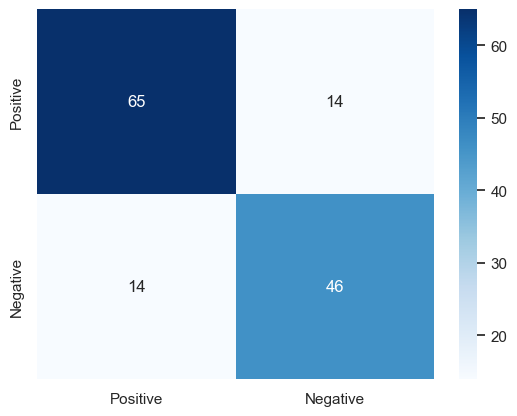

In [208]:
# visualizing confusion matrix
sns.heatmap(cm,annot=True, cmap="Blues")
plt.xticks([0.5, 1.5], ['Positive', 'Negative'])  # Modify x-axis tick labels
plt.yticks([0.5, 1.5], ['Positive', 'Negative'])  # Modify y-axis tick labels
plt.show()


## Accuracy Score

In [209]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7985611510791367

## Classification Report

In [210]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        79
           1       0.77      0.77      0.77        60

    accuracy                           0.80       139
   macro avg       0.79      0.79      0.79       139
weighted avg       0.80      0.80      0.80       139


## Saving the Model

In [211]:
import pickle
with open("model", "wb") as file:
    pickle.dump(classifier,file)

## Save The Scale

In [212]:
with open("model_2", "wb") as file_2:
    pickle.dump(sc,file_2)